<a href="https://colab.research.google.com/github/DanielaMdzArv/Inteligencia-Artificial-DMA/blob/main/Perceptr%C3%B3n_multicapa_Fuente_de_datos_personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perceptrón Tic-Tac-Toe Endgame**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Clase Perceptron corregida para Tic-Tac-toe
class Perceptron:
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta  # Tasa de aprendizaje
        self.n_iter = n_iter  # Número de iteraciones o épocas
        self.random_state = random_state  # Estado para la semilla aleatoria

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Pesos iniciales
        self.errors_ = []  # Lista para almacenar los errores en cada época

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Actualización de los pesos
                self.w_[1:] += update * xi  # Actualización de pesos para las características
                self.w_[0] += update  # Actualización del sesgo
                errors += int(update != 0.0)  # Contar las actualizaciones
            self.errors_.append(errors)  # Guardar el número de errores de cada época
        return self

    def net_input(self, X):
      """Calcular la entrada neta"""
      return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
      """Predicción"""
      return np.where(self.net_input(X) >= 0.0, 1, -1)


In [3]:

# Cargar el conjunto de datos Tic-Tac-Toe desde el link
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'
df = pd.read_csv(url, header=None)

# Inspeccionar las primeras filas del dataset
print(df.head())

# Asignar los datos (X) y las etiquetas (y)
# Las columnas 0-8 son las características (X), la columna 9 es la etiqueta (y)
X = df.iloc[:, 0:9].values
y = df.iloc[:, 9].values

# Convertir etiquetas categóricas en numéricas
le = LabelEncoder()
y = le.fit_transform(y)  # Donde 'positive' será 1 y 'negative' será 0

# Convertir las características categóricas a numéricas
X_encoded = np.array([le.fit_transform(feature) for feature in X.T]).T

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1)

   0  1  2  3  4  5  6  7  8         9
0  x  x  x  x  o  o  x  o  o  positive
1  x  x  x  x  o  o  o  x  o  positive
2  x  x  x  x  o  o  o  o  x  positive
3  x  x  x  x  o  o  o  b  b  positive
4  x  x  x  x  o  o  b  o  b  positive


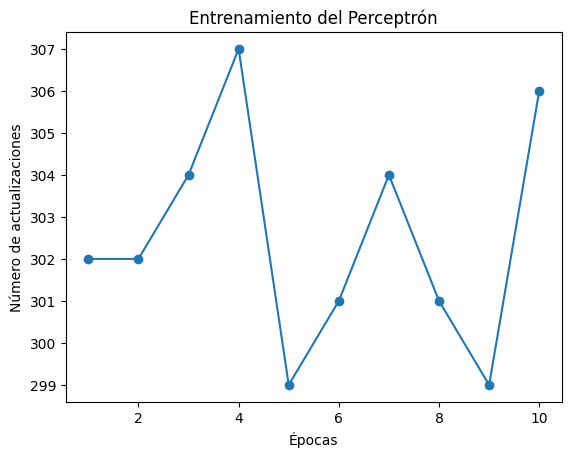

Precisión del modelo: 57.64%


In [4]:
# Entrenar el modelo de perceptrón
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
ppn.fit(X_train, y_train)

# Mostrar el número de errores por época
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.title('Entrenamiento del Perceptrón')
plt.show()

# Probar el modelo
y_pred = ppn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")